In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np
import sympy as sym

import panel as pn
pn.extension()

## Invoke itikz without using cell magic
#     itikz.build_commands?
#     itikz.fetch_or_compile_svg?

# 1. Examples from the Original Itikz Notebook 

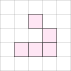

In [2]:
%%itikz --temp-dir --file-prefix implicit-demo- --template pic --use-xetex --scale 0.5
\draw[help lines] grid (5, 5);
\draw[fill=magenta!10] (1, 1) rectangle (2, 2);
\draw[fill=magenta!10] (2, 1) rectangle (3, 2);
\draw[fill=magenta!10] (3, 1) rectangle (4, 2);
\draw[fill=magenta!10] (3, 2) rectangle (4, 3);
\draw[fill=magenta!10] (2, 3) rectangle (3, 4);

In [3]:
%%itikz --temp-dir --template standalone --tex-packages=smartdiagram,amsfonts
\smartdiagramset{uniform sequence color=true,
sequence item border color=black,
sequence item font size=\footnotesize,
sequence item text color=white
}
\smartdiagram[sequence diagram]{
    $\mathbb{N}$,
    $\mathbb{Z}$,
    $\mathbb{Q}$,
    $\mathbb{R}$,
    $\mathbb{I}$,
    $\mathbb{C}$
}

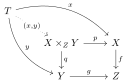

In [4]:
src = r"""
\documentclass[tikz]{standalone}
\usepackage{tikz-cd}
\usetikzlibrary{cd}

\begin{document}
\begin{tikzcd}
T
\arrow[drr, bend left, "x"]
\arrow[ddr, bend right, "y"]
\arrow[dr, dotted, "{(x,y)}" description] & & \\
& X \times_Z Y \arrow[r, "p"] \arrow[d, "q"]
& X \arrow[d, "f"] \\
& Y \arrow[r, "g"]
& Z
\end{tikzcd}
\end{document}
"""

itikz.fetch_or_compile_svg(src, prefix="cd_", working_dir="/tmp/itikz", full_err=False, debug=False)

# 2. Linear Algebra Examples

## 2.1 Row-echelon Form

### 2.2.1 Row Echelon Form Matrix: Numerical Example

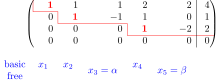

In [5]:
%%itikz --temp-dir --template standalone --tex-packages=nicematrix,tikz,relsize,amsmath --tikz-libraries=decorations.pathreplacing
% --nexec=4  --use-dvi --use-xetex 
\NiceMatrixOptions{code-for-last-row = \color{blue}, code-for-first-row = \color{red}}
$\begin{pNiceArray}{*5r|r}[left-margin = 4pt, first-col, last-row,
    code-before =
    {
    % ----------------------------------------------------------------------- Row-echelon form Path
    \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1)
                  -- (row-2-|col-2) -- (row-3-|col-2)
                  -- (row-3-|col-4) -- (row-4-|col-4)
                  -- (row-4-|col-7);
    }
]
    & \color{red}{\mathbf{1}}   & 1                       &  1 &  2                       &  2 & \;  4 \\
    & 0                         & \color{red}{\mathbf{1}} & -1 &  1                       &  0 & \;  1 \\
    & 0                         & 0                       &  0 &  \color{red}{\mathbf{1}} & -2 & \;  2 \\
    & 0                         & 0                       &  0 &  0                       &  0 & \;  0 \\
% ------------------------------------------------------------------------------------ Basic and Free Variables
\color{blue}{\begin{matrix} \\ \text{basic}\\ \text{free} \end{matrix}}
    & \begin{matrix} x_1        \\             \end{matrix}
    & \begin{matrix} x_2        \\             \end{matrix}
    & \begin{matrix}            \\  x_3=\alpha \end{matrix}
    & \begin{matrix} x_4        \\             \end{matrix}
    & \begin{matrix}            \\  x_5=\beta  \end{matrix}
    &
\end{pNiceArray}$

### 2.1.2 Stack of Matrices

In [6]:
mat_rep = r'''
      &&                   A &                    b \\  \noalign{\vskip1.5mm}
E_1   &&               E_1 A &                E_1 b \\  \noalign{\vskip1.5mm}
E_2   &&           E_2 E_1 A &            E_2 E_1 b \\  \noalign{\vskip1.5mm}
\dots && \dots               & \dots                \\  \noalign{\vskip1.5mm}
E_k   && E_k \dots E_2 E_1 A &  E_k \dots E_2 E_1 b
'''
submatrix_locs=[ ['A1','{1-3}{1-4}'],['A2','{2-3}{2-4}'],['A3','{3-3}{3-4}'],['A4','{5-3}{5-4}'],
                 ['A5','{2-1}{2-1}'],['A6','{3-1}{3-1}'],['A7','{5-1}{5-1}']
               ]
pivot_locs=[]
txt_with_locs=[]
mat_format='{ccrIr}'

itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,fig_scale=None, array_names=None,row_echelonPaths=[],
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, submatrix_names=pivot_locs, txt_with_locs=txt_with_locs, row_echelon_paths=[]),
                            prefix='test_', working_dir='/tmp/itikz', debug=False,
                            **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_file="/tmp/itikz/foo" )

TemplateSyntaxError: unexpected char '\\' at 427

## 2.2 Systeme

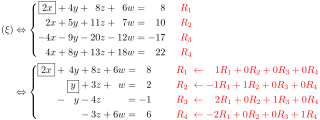

In [7]:
%%itikz --temp-dir  --file-prefix foo_  --template article --crop --tex-packages=systeme,amsmath,xcolor
%--use-dvi --use-xetex
% -----------------------------------------------------
\begin{flalign*}
(\xi)
& \Leftrightarrow \sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z   + 6 w   = 8     @\color{red}{R_1},
      2  x          + 5 y  + 11 z  + 7 w   = 10   @\color{red}{R_2},
      -4 x          -9  y  -20  z  -12 w   = -17  @\color{red}{R_3},
      4  x          + 8 y  + 13 z  + 18 w  = 22   @\color{red}{R_4}
      } \\
%
\sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
& \Leftrightarrow \sysautonum{\quad \color{red}{R_{*}\; \leftarrow \;}}
\sysalign{r,r}\systeme[xyzw]{
      \boxed{2 x}  + 4 y  + 8 z  + 6 w   = 8  @\color{red}{\ \;\;1 R_1 + 0 R_2 + 0 R_3 + 0 R_4},
                \boxed{y} + 3 z  +   w   = 2  @\color{red}{   -1 R_1 + 1 R_2 + 0 R_3 + 0 R_4},
                    -  y  - 4 z         = -1  @\color{red}{\ \;\;2 R_1 + 0 R_2 + 1 R_3 + 0 R_4},
                          - 3 z  + 6 w  =  6  @\color{red}{   -2 R_1 + 0 R_2 + 0 R_3 + 1 R_4}
      }
\end{flalign*}

## 2.3 Programmatic Calls: GE Layout with PySym and Jinja2

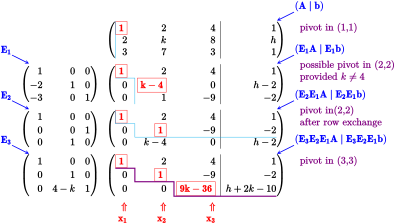

In [8]:
k = sym.Symbol('k'); h = sym.Symbol('h')
Ab = sym.Matrix([[1,2,4,1],[2,k,8,h],[3,7,3,1]]); matrices = [[None, Ab]]; pivots = []; txt=[]
# we could use row ops, but we want a computational layout:
#    A=A.elementary_row_op('n->n+km', k=-3, row1=2,row2=0 );A
#    A=A.elementary_row_op('n<->m',row1=1,row2=2);A

E1=sym.eye(3);E1[1:,0]=[-2,-3]; A1=E1*Ab;                               matrices.append([E1,A1]); pivots.append((1,1));txt.append('Pivot at (1,1)')
E2=sym.eye(3);E2=E2.elementary_row_op('n<->m',row1=1,row2=2); A2=E2*A1; matrices.append([E2,A2]); pivots.append(None); txt.append('Rows 2 <-> 3')
E3=sym.eye(3);E3[2,1]=4-k; A3=E3*A2;                                    matrices.append([E3,A3]); pivots.append((2,2));txt.append('Pivot at (2,2)')
pivots.append((3,3)); txt.append('In Row Echelon Form')


h,m = nM.ge( matrices, Nrhs=[1],
             formater = sym.latex,
             pivot_list=[ [(0,1), [(0,0)] ],
                          [(1,1), [(0,0),(1,1)]],
                          [(2,1), [(0,0),(1,1)]],
                          [(3,1), [(0,0),(1,1),(2,2)]]
                          ],
             ref_path_list = [ [0,1, [(0,0)            ],'vv','cyan'],
                               [1,1, [(0,0),(1,1)      ],'hv','cyan'],
                               [2,1, [(0,0),(1,1)      ],'vh','cyan'],
                               [3,1, [(0,0),(1,1),(2,2)],'hh']
                             ],
             comment_list = ["pivot in (1,1)",
                             r"possible pivot in (2,2) \\ \qquad provided $k \ne 4$",
                             r"pivot in(2,2)\\ \qquad after row exchange","pivot in (3,3)"],  # <===== ???? Where are they?
             variable_summary = [True,True,True],
             array_names = ['E', ['A', 'b']],
             tmp_dir="tmp", keep_file="tmp/m3"
)
h

## 2.4 Back-Substitution: Row Echelon Form, Back-substitution, Standard Form

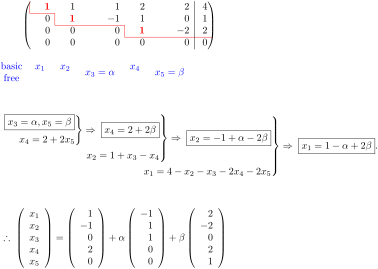

In [9]:
%%itikz --temp-dir  --file-prefix test_  --template article --tex-packages=amssymb,cascade,systeme,nicematrix,tikz,relsize --crop --tikz-libraries=decorations.pathreplacing

% ==================================================================================== Decorate matrix
    \NiceMatrixOptions{code-for-last-row = \color{blue}, code-for-first-row = \color{red}}
    $\begin{pNiceArray}{*5r|r}[left-margin = 4pt, first-col, last-row,
        code-before =
        {
        % ----------------------------------------------------------------------- Row-echelon form Path
        \tikz \draw[red] (row-1-|col-1) -- (row-2-|col-1)
                      -- (row-2-|col-2) -- (row-3-|col-2)
                      -- (row-3-|col-4) -- (row-4-|col-4)
                      -- (row-4-|col-7);
        }
    ]
        & \color{red}{\mathbf{1}}   & 1                       &  1 &  2                       &  2 & \;  4 \\
        & 0                         & \color{red}{\mathbf{1}} & -1 &  1                       &  0 & \;  1 \\
        & 0                         & 0                       &  0 &  \color{red}{\mathbf{1}} & -2 & \;  2 \\
        & 0                         & 0                       &  0 &  0                       &  0 & \;  0 \\
    % ------------------------------------------------------------------------------------ Basic and Free Variables
    \color{blue}{\begin{matrix} \\ \text{basic}\\ \text{free} \end{matrix}}
        & \begin{matrix} x_1        \\             \end{matrix}
        & \begin{matrix} x_2        \\             \end{matrix}
        & \begin{matrix}            \\  x_3=\alpha \end{matrix}
        & \begin{matrix} x_4        \\             \end{matrix}
        & \begin{matrix}            \\  x_5=\beta  \end{matrix}
        &
    \end{pNiceArray}$
    % ==================================================================================== Solve by Back-substitution
    \vspace{1cm}       % below the figure; inkscape cropping fails otherwise...

    % ------------------------------------------------------------------------------------ Solve
        {\ShortCascade%
           {\ShortCascade%
              {\ShortCascade%
                 {$\boxed{x_3 = \alpha, x_5=\beta}$}%
                 {$x_4 = 2 + 2 x_5$}%
                 {$\;\Rightarrow\; \boxed{x_4 =  2 + 2 \beta}$}%
              }%
              {$x_2 = 1 +x_3-x_4$}%
              {$\;\Rightarrow\; \boxed{x_2 = -1+\alpha-2\beta}$}%
           }%
           {$x_1 = 4 - x_2 - x_3 - 2 x_4 -2 x_5$}%
           {$\;\Rightarrow \; \boxed{x_1 =  1-\alpha+2\beta}.$}
        }%
    %& % --------------------------------------------------------------------------------- Standard Form
    \vspace{1cm}

        {$\; \therefore\;        \left( \begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right)
                        =        \left( \begin{array}{r}  1  \\  -1 \\   0 \\   2 \\   0 \end{array} \right)
                        + \alpha \left( \begin{array}{r} -1  \\   1 \\   1 \\   0 \\   0 \end{array} \right)
                        + \beta  \left( \begin{array}{r}  2  \\  -2 \\   0 \\   2 \\   1 \end{array} \right)
             $
        }

## 2.5 QR Decomposition

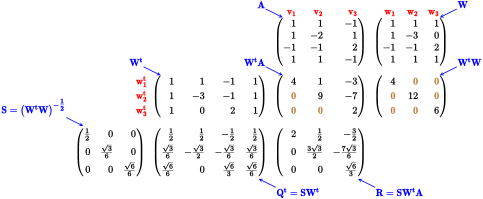

In [10]:
A = sym.Matrix([[ 1,  1, -1],
                [ 1, -2,  1],
                [-1, -1,  2],
                [ 1,  1, -1]])
W = sym.Matrix([[ 1,  1,  1],
                [ 1, -3,  0],
                [-1, -1,  2],
                [ 1,  1,  1]])

WtW  = W.T @ W
WtA  = W.T @ A
S    = WtW**(-1)
for i in range(S.shape[0]):
    S[i,i]=sym.sqrt(S[i,i])

Qt = S*W.T
R  = S*WtA

matrices =  [ [ None,  None,   A,    W ],
              [ None,   W.T, WtA,  WtW ],
              [ S,       Qt,   R, None ] ]

h,mz = nM.qr( matrices, formater=sym.latex, array_names=True, tmp_dir="tmp", keep_file='tmp/qr_fancy')
h

# 3 Geometric Figures

## 3.1 Graph with Arrows

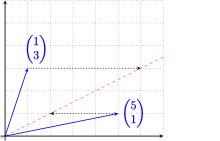

In [11]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 0.8 --tex-packages=amsmath

% axes
  \draw[thick,>=stealth,->]           (0,-0.2) -- (0,6);
  \draw[thick,>=stealth,->]           (-0.2,0) -- (7,0);

% grid lines
   \draw[step=1.0,black,thin,dotted,xshift=1cm,yshift=1cm] (-1,-1) grid (6,5);

% draw the output line
  \draw[thin,draw=red, dashed] (-0.2,-0.1) -- (7,3.5)  node[right, text=blue, text width=5em] {};

% starting vector blue, transformed vector red
  \draw[thick,>=stealth,->,draw=blue] (0,0) -- (5,1)  node[right, text=blue,  text width=5em] {\large $\mathbf{\begin{pmatrix} 5 \\ 1 \end{pmatrix}}$};
  \draw[thick,>=stealth,->,dotted,draw=black] (5,1) -- (2,1);
  \draw[thick,>=stealth,->,draw=blue] (0,0) -- (1,3)  node[text=blue, label={[xshift=0.3cm, yshift=-0.1cm]\large $\color{blue}{\mathbf{\begin{pmatrix} 1 \\ 3 \end{pmatrix}}}$}] (x2) {};
  \draw[thick,>=stealth,->,dotted,draw=black] (1,3) -- (6,3);

## 3.2 Parallelograms

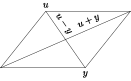

In [12]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 2 --tex-packages=amsmath --tikz-libraries quotes

    \node (n) [draw, minimum width=3cm, minimum height=2cm, xslant=0.8] {};
    \draw (n.south west) to ["$u+y$",pos=0.7,sloped] (n.north east)
          (n.north west) node[above] {$u$} 
                         to ["$u-y$",pos=0.3,sloped] (n.south east) node[below] {$y$};

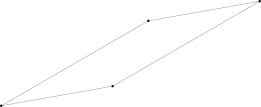

In [13]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 2 --tex-packages=tkz-euclide --tikz-libraries arrows
\tkzDefPoint(0,0){A}
\tkzDefPoint(30:3){B}
\tkzDefShiftPointCoord[B](10:2){C}
\tkzDefShiftPointCoord[A](10:2){D}
\tkzDrawPolygon(A,...,D)
\tkzDrawPoints(A,...,D)

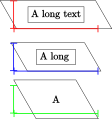

In [14]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tikz-libraries shapes.geometric
\tikzstyle{every node}=[trapezium, draw, minimum width=3cm,
trapezium left angle=120, trapezium right angle=60]

\node[trapezium stretches=false,minimum height=1cm]
    at (0,0) {A};

\node[trapezium stretches=false,minimum height=1cm]
    at (0,1.5) {\fbox{A long }};

\node[trapezium stretches=false,minimum height=1cm]
    at (0,3) {\fbox{A long text}};

\draw[thick,green,|-|] (-1.5,-.5) -- (1.5,-0.5);
\draw[thick,green,|-|] (-1.5,0.5) -- (-1.5,-0.5);

\draw[thick,blue,|-|] (-1.5,1) -- (1.5,1);
\draw[thick,blue,|-|] (-1.5,1) -- (-1.5,2);

\draw[thick,red,|-|] (-1.5,2.5) -- (1.5,2.5);
\draw[thick,red,|-|] (-1.5,2.5) -- (-1.5,3.5);


## 3.3 Arcs

### 3.3.1 Arcs with pgfplot

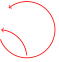

In [15]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=pgfplots --tikz-libraries=calc
\def\centerarc[#1](#2)(#3:#4:#5)% Syntax: [draw options] (center) (initial angle:final angle:radius)
    { \draw[#1] ($(#2)+({#5*cos(#3)},{#5*sin(#3)})$) arc (#3:#4:#5); }

\centerarc[red,thick,->](0,0)(5:85:1) ;
\centerarc[red,thick,->](1,1)(-160:130:1) ;

### 3.3.2 Arcs with tkz-euclide

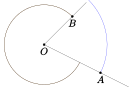

In [16]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=tkz-euclide --tikz-libraries=calc
\tkzDefPoint(0,0){O}
\tkzDefPoint(2,-1){A}
\tkzDefPoint(1,1){B}
\tkzDrawArc[color=blue](O,A)(B)
\tkzDrawArc[color=brown](O,B)(A)
\tkzDrawArc(O,B)(A)
\tkzDrawLines[add = 0 and .5](O,A O,B)
\tkzDrawPoints(O,A,B)
\tkzLabelPoints[below](O,A,B)

### 3.1.3 Arcs with Tikz

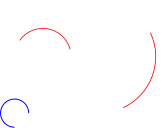

In [17]:
%%itikz --temp-dir --file-prefix graph- --template pic --use-xetex --scale 1 --tex-packages=amsmath --tikz-libraries=calc
\newcommand{\cercle}[4]{
\node[circle,inner sep=0,minimum size={2*#2}](a) at (#1) {};
\draw[red,thick] (a.#3) arc (#3:{#3+#4}:#2);
}
                  
\newcommand{\mycercle}[6]{
\node[circle,inner sep=0,minimum size={2*#2}](a) at (#1) {};
\draw[#6,line width=#5] (a.#3) arc (#3:{#3+#4}:#2);
}

\coordinate (OR) at (0.00, 0.00);
 \coordinate (center) at (3,2);

\cercle{center}{2cm}{25}{-90}
![\cercle{1,2}{1cm}{15}{130}][1]

\mycercle {OR} {0.5cm} {0} {270} {1.00} {blue} ;


In [18]:
itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True)

{'tex_program': ['latexmk', '-quiet', '-silent', '-xelatex'],
 'svg_converter': [['pdf2svg'], '.pdf'],
 'svg_crop': ['inkscape',
  '--batch-process',
  '--export-plain-svg',
  '-D',
  '--export-margin=1',
  '-o']}

## 3.4 3D Examples

In [19]:
%reload_ext itikz
import itikz
from itikz import nicematrix as nM
from itikz.tikz import tikz_source

import jinja2

import numpy as np
import sympy as sym

import panel as pn
pn.extension()

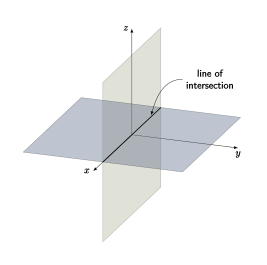

In [20]:
src = tikz_source(
r"""% ======================================================= colors
\definecolor{la_white}{RGB}{233,235,223} %#E9EBDF
\definecolor{la_dark}{RGB}{59,54,81}     %#3B3651
\definecolor{la_gray}{RGB}{96,112,139}   %#60708B
\definecolor{la_tan}{RGB}{152,159,122}   %#989F7A

% -------------------------------------------------------- axes
\draw[-latex] (0,0,0) -- (4,0,0) node[left] {$x$};
\draw[-latex] (0,0,0) -- (0,4,0) node[below] {$y$};
\draw[-latex] (0,0,0) -- (0,0,4) node[left] {$z$};

%  ---------------------------------------------------------- planes
\draw[fill=la_tan,opacity=0.3] (-3,0,-3) -- (-3,0,3) -- (3,0,3) -- (3,0,-3) -- cycle;
\draw[fill=la_gray,opacity=0.4] (-3,-3,0) -- (-3,3,0) -- (3,3,0) -- (3,-3,0) -- cycle;
\draw[thick](-3,0,0)--(3,0,0);  % intersection of the planes

%  ---------------------------------------------------------- text decoration
\node[anchor=south west,align=center] (line) at (3,3,3) {line of\\ intersection};
\draw[-latex] (line) to[out=180,in=75] (-2,0,0.05);
""",
                  class_args="border=23.14pt",
                  tex_packages="tikz-3dplot",
                  preamble=r"\tdplotsetmaincoords{70}{110}",
                  tikz_args=r"tdplot_main_coords,font=\sffamily"
                 )
itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/foo" )

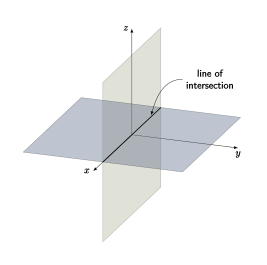

In [21]:
def tikz_source( code,
                 class_args=None, tex_packages=None, tikz_libraries=None, extension="% no_extension", 
                 preamble="% preamble", tikz_args=None):
    template = r"""\documentclass[tikz{% for a in class_args %},{{a}}{% endfor %}]{standalone}
\pagestyle{empty}
{% for p in tex_packages %}
{{p}}
{% endfor %}
{% for p in tikz_libraries %}
\usetikzlibrary{{p}}
{% endfor %}
{{extension}}

\begin{document}
{{preamble}}
\begin{tikzpicture}{% for p in tikz_args %}{{p}}{% endfor %}
   {{tikz_code}}
\end{tikzpicture}
\end{document}
"""
    import re
    pattern = re.compile( r'(\[[^]]*])(.*)' )
    def split(arg):
        if arg is None:
            return []
        l = []
        for a in arg.split(","):
            match = pattern.match( a )
            if match:
                l.append( r"\usepackage" + match.group(1) + "{" + match.group(2)+ "}" )
            else:
                l.append(r"\usepackage{" + a + "}")
        return l


    class_args     = [] if class_args     is None else [class_args]
    tex_packages   = split(tex_packages)
    tikz_libraries = [] if tikz_libraries is None else ["{"+tikz_libraries+"}"]
    tikz_args      = [] if tikz_args      is None else ["["+tikz_args+"]"]

    src=jinja2.Template( template )\
              .render( class_args=class_args,
                       tex_packages=tex_packages,
                       tikz_libraries=tikz_libraries,
                       extension=extension,
                       preamble=preamble,
                       tikz_args=tikz_args,
                       tikz_code=code
                     )

    return src

src = tikz_source(
r"""% ======================================================= colors
\definecolor{la_white}{RGB}{233,235,223} %#E9EBDF
\definecolor{la_dark}{RGB}{59,54,81}     %#3B3651
\definecolor{la_gray}{RGB}{96,112,139}   %#60708B
\definecolor{la_tan}{RGB}{152,159,122}   %#989F7A

% -------------------------------------------------------- axes
\draw[-latex] (0,0,0) -- (4,0,0) node[left] {$x$};
\draw[-latex] (0,0,0) -- (0,4,0) node[below] {$y$};
\draw[-latex] (0,0,0) -- (0,0,4) node[left] {$z$};

%  ---------------------------------------------------------- planes
\draw[fill=la_tan,opacity=0.3] (-3,0,-3) -- (-3,0,3) -- (3,0,3) -- (3,0,-3) -- cycle;
\draw[fill=la_gray,opacity=0.4] (-3,-3,0) -- (-3,3,0) -- (3,3,0) -- (3,-3,0) -- cycle;
\draw[thick](-3,0,0)--(3,0,0);  % intersection of the planes

%  ---------------------------------------------------------- text decoration
\node[anchor=south west,align=center] (line) at (3,3,3) {line of\\ intersection};
\draw[-latex] (line) to[out=180,in=75] (-2,0,0.05);
""",
                  class_args="border=23.14pt",
                  tex_packages="tikz-3dplot",
                  preamble=r"\tdplotsetmaincoords{70}{110}",
                  tikz_args=r"tdplot_main_coords,font=\sffamily"
                 )
itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/foo" )

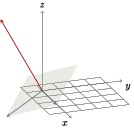

In [23]:
src = tikz_source(
    r"""% ======================================================= colors
    \definecolor{la_white}{RGB}{233,235,223} %#E9EBDF
    \definecolor{la_dark}{RGB}{59,54,81}     %#3B3651
    \definecolor{la_gray}{RGB}{96,112,139}   %#60708B
    \definecolor{la_tan}{RGB}{152,159,122}   %#
    \definecolor{la_red}{RGB}{152,0,0}   %#

    \draw[thin,->] (0,0,0) -- (1,0,0) node[anchor=north east]{$x$};
    \draw[thin,->] (0,0,0) -- (0,1,0) node[anchor=north west]{$y$};
    \draw[thin,->] (0,0,0) -- (0,0,1) node[anchor=south]{$z$};

    \tdplotsetcoord{O}{0}{0}{0}
    \tdplotsetcoord{P}{1.}{90}{-45}
    \tdplotsetcoord{Q}{1.}{80}{-10}
    \tdplotsetcoord{W}{1.}{-30}{60}

    \tdplotsetcoord{Pn}{-1.}{90}{-45}
    \tdplotsetcoord{Qn}{-1.}{80}{-10}
 
    \foreach \x in {-0.2,0,...,0.8}
        \foreach \y in {-0.2,0,...,0.8}
        {
            \draw[very thin,gray] (\x,-0.2) -- (\x,0.8);
            \draw[very thin,gray] (-0.2,\y) -- (0.8,\y);
        }

    %\def\x{.5}
    %\filldraw[
    %    draw=la_tan!10,%
    %    fill=la_gray!20,%
    %]          (0,0,0)
    %        -- (\x,{sqrt(3)*\x},0)
    %        -- (\x,{sqrt(3)*\x},1)
    %        -- (0,0,1)
    %        -- cycle;

    %\draw[color=la_dark!10,fill=la_gray!60, nearly transparent] (O) -- (P) -- (Q) -- cycle;
    \draw[color=la_dark!10,fill=la_tan!80, nearly transparent] (Pn) -- (Qn) -- (P) -- (Q) -- cycle;

    %draw a vector from origin to point (P)
    \draw[thick,-stealth,color=la_gray] (O) -- (P);
    \draw[thick,-stealth,color=la_gray] (O) -- (Q);
    \draw[thick,-stealth,color=la_red]  (O) -- (W);
    """,
    #class_args="border=23.14pt",
    tex_packages="ifthen,tikz-3dplot",
    preamble=r"""% -----------------------------------------------
\tdplotsetmaincoords{70}{70}
""",
    tikz_args=r"tdplot_main_coords,font=\sffamily,scale=3."
)

itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/bah" )

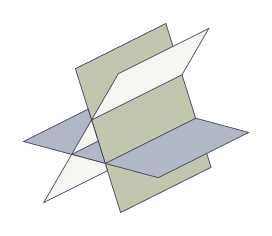

In [24]:
src = tikz_source(
r"""
% ======================================================= colors
\definecolor{la_white}{RGB}{233,235,223} %#E9EBDF
\definecolor{la_dark}{RGB}{59,54,81}     %#3B3651
\definecolor{la_gray}{RGB}{96,112,139}   %#60708B
\definecolor{la_tan}{RGB}{152,159,122}   %#989F7A

\coordinate (A) at (0.95,3.41);
\coordinate (B) at (1.95,0.23);
\coordinate (C) at (3.95,1.23);
\coordinate (D) at (2.95,4.41);

\coordinate (E) at (1.90,3.30);
\coordinate (F) at (0.25,0.45);
\coordinate (G) at (2.25,1.45);
\coordinate (H) at (3.90,4.30);

\coordinate (I) at (-0.2,1.80);
\coordinate (J) at (2.78,1.00);
\coordinate (K) at (4.78,2.00);
\coordinate (L) at (1.80,2.80);

\path[name path=AB] (A) -- (B);
\path[name path=CD] (C) -- (D);
\path[name path=EF] (E) -- (F);
\path[name path=IJ] (I) -- (J);
\path[name path=KL] (K) -- (L);
\path[name path=HG] (H) -- (G);
\path[name path=IL] (I) -- (L);

\path [name intersections={of=AB and EF,by=M}];
\path [name intersections={of=EF and IJ,by=N}];
\path [name intersections={of=AB and IJ,by=O}];
\path [name intersections={of=AB and IL,by=P}];
\path [name intersections={of=CD and KL,by=Q}];
\path [name intersections={of=CD and HG,by=R}];
\path [name intersections={of=KL and HG,by=S}];
\path [name path=NS] (N) -- (S);
\path [name path=FG] (F) -- (G);
\path [name intersections={of=NS and AB,by=T}];
\path [name intersections={of=FG and AB,by=U}];

\draw[thick,  color=la_dark, fill=la_tan!60] (A) -- (B) -- (C) -- (D) -- cycle;
%\draw[thick, color=la_dark, fill=la_tan!60] (E) -- (F) -- (G) -- (H) -- cycle;
%\draw[thick, color=la_dark, fill=la_tan!60] (I) -- (J) -- (K) -- (L) -- cycle;

\draw[thick, color=la_dark, fill=la_gray!50] (P) -- (O) -- (I) -- cycle;
\draw[thick, color=la_dark, fill=la_gray!50] (O) -- (J) -- (K) -- (Q) -- cycle;

\draw[thick, color=la_dark, fill=la_tan!10] (H) -- (E) -- (M) -- (R) -- cycle;
\draw[thick, color=la_dark, fill=la_tan!10] (M) -- (N) -- (T) -- cycle;
\draw[thick, color=la_dark, fill=la_tan!10] (N) -- (F) -- (U) -- (O) -- cycle;
""",
class_args="border=23.14pt",
#tex_packages="tikz-3dplot",
tikz_libraries="positioning,calc,intersections",
#preamble=r"\tdplotsetmaincoords{70}{110}",
tikz_args=r"scale=1.6"
)

itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/bah" )

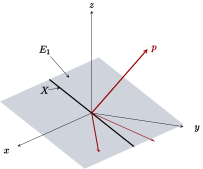

In [25]:
src = tikz_source(
r"""% ======================================================= colors
\definecolor{la_white}{RGB}{233,235,223}
\definecolor{la_dark}{RGB}{59,54,81}
\definecolor{la_gray}{RGB}{96,112,139}
\definecolor{la_tan}{RGB}{152,159,122}
\definecolor{la_red}{RGB}{152,0,0}

\tdplotsetrotatedcoords{00}{30}{0}
     \begin{scope}[tdplot_rotated_coords]
          \begin{scope}[canvas is xy plane at z=0]
               \fill[la_gray,fill opacity=0.3] (-2,-3.5) rectangle (2,3.5); % ===============   the plane
               \draw[very thick] (-2,0) -- (2,0);                           %                   line on the plane

               \path (-150:2) coordinate (H) (-1.5,0) coordinate(X);
               \pgflowlevelsynccm
               \draw[very thick,-stealth,la_red] (0,0) -- (-30:2.5);        % vector on the plane?
               \draw[very thick,-stealth,la_red] (0,0) -- (50:2.5);        % vector on the plane?
          \end{scope} 
          \draw[stealth-] (H) -- ++ (-1,0,0.2) node[pos=1.3]{$E_1$};    % =================  decorate eigenspace E_1

          \draw[stealth-] (X) -- ++ (0,1,0.2)  node[pos=1.3] {$X$};
          \draw[very thick,-stealth,color=la_red]  (0,0,0) coordinate (O) -- (1,1,4) node[right]{$p$};  % coords are (y,x,z) ?!
     \end{scope}

     \pgfmathsetmacro{\Radius}{1.5}
     \draw[-stealth] (O) -- (2.5*\Radius,0,0) node[pos=1.15] {$y$};
     \draw[-stealth] (O) -- (0,3.5*\Radius,0) node[pos=1.15] {$x$};
     \draw[-stealth] (O) -- (0,0,2.5*\Radius) node[pos=1.05] {$z$};
""",
    #class_args="border=23.14pt",
    tex_packages="ifthen,tikz-3dplot",
    preamble=r"""% -----------------------------------------------
\tdplotsetmaincoords{105}{-30}
""",
    tikz_args=r"tdplot_main_coords,font=\sffamily,scale=1."
)

itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/bah" )

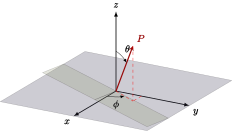

In [26]:
src = tikz_source(
r"""% ======================================================= colors
  \definecolor{la_white}{RGB}{233,235,223}
  \definecolor{la_dark}{RGB}{59,54,81}
  \definecolor{la_gray}{RGB}{96,112,139}
  \definecolor{la_tan}{RGB}{152,159,122}
  \definecolor{la_red}{RGB}{152,10,10}

  % variables
  \def\rvec{.8}
  \def\thetavec{30}
  \def\phivec{60}
 
  % ------------------------------------------------------------------------ axes
  \coordinate (O) at (0,0,0);
  \draw[thick,->] (0,0,0) -- (1,0,0) node[anchor=north east]{$x$};
  \draw[thick,->] (0,0,0) -- (0,1,0) node[anchor=north west]{$y$};
  \draw[thick,->] (0,0,0) -- (0,0,1) node[anchor=south]     {$z$};

  \filldraw[fill=la_dark, nearly transparent] (-1,1,0) -- (1,1,0) -- (1,-1,0) 
                                             -- (-1,-1,0) -- cycle ;           % x-y plane

  % a= s(1,2,0), b=t(1,0,.1)
  % 0,OA,0A+OB,0B     (0,0,0) -- (s,2s,0) -- (s+t,2s,.1t) -- (t,0,.1t) -- cycle;
  %                   (0,0,0) -- (-s,-2s,0) -- (-s+t,-2s,.1t) -- (t,0,.1t) -- cycle;
  % take t=.5,s=.5  

  \filldraw[fill=la_tan, nearly transparent] (0,0,0) -- (.5,1,0) -- (1,1,.05)
                                                     -- (.5,0,.05) -- cycle;
  \filldraw[fill=la_tan, nearly transparent] (0,0,0) -- (-.5,-1,0) -- (0,-1,.05)
                                                     -- (.5,0,.05) -- cycle;
  
  % ------------------------------------------------------------------------ vectors
  \tdplotsetcoord{P}{\rvec}{\thetavec}{\phivec}  % P

  \draw[-stealth,la_red,very thick] (O)  -- (P) node[above right] {$P$};
  \draw[dashed,red]   (O)  -- (Pxy);
  \draw[dashed,red]   (P)  -- (Pxy);
  \draw[dashed,red]   (Py) -- (Pxy);
 
  % ------------------------------------------------------------------------- arcs
  \tdplotdrawarc[->]{(O)}{0.2}{0}{\phivec}  {anchor=north}{$\phi$}

  \tdplotsetthetaplanecoords{\phivec}
  \tdplotdrawarc[->,tdplot_rotated_coords]{(0,0,0)}{0.5}{0}{\thetavec}  {anchor=south west}{$\theta$}
""",
# =============================================================================================
#class_args="border=23.14pt",
tex_packages="ifthen,tikz-3dplot",
extension=
r"\tikzset{>=latex} % for LaTeX arrow head",
preamble =
r"""
\tdplotsetmaincoords{70}{120}
""",
tikz_args=r"tdplot_main_coords,font=\sffamily,scale=3."
)

itikz.fetch_or_compile_svg( src,
      prefix='test_', working_dir='/tmp/itikz', debug=False,
    **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=False),
      nexec=1, keep_file="/tmp/bah1" )